In [ ]:
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D, LeakyReLU
from keras.models import Sequential, Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [ ]:
# Unzipping the dataset
import zipfile
import os

zip_path = '/content/new.zip'  # Change this path if necessary

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content')  # Extracting it to the /content/dataset folder

In [ ]:
data = []
data_dir = '/content/new'
dirs = os.listdir(data_dir)

for i in dirs:
    path = os.path.join(data_dir,i)
    for img in os.listdir(path):
        image = cv.imread(os.path.join(path,img))
        image = cv.resize(image, (64,64))
        data.append([image, i])

In [ ]:
images = []
labels = []

for img, lab in data:
    images.append(img)
    labels.append(lab)

In [ ]:
images = np.array(images)
images = images/255.
le = LabelEncoder()
encoded = le.fit_transform(labels)

In [ ]:
labels = np.array(labels)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(images, encoded, test_size=0.1)

In [ ]:
inputs = Input(shape=(64, 64, 3))

x1 = Conv2D(32, (2, 2), input_shape=(64, 64, 3), padding="same")(inputs)
x2 = LeakyReLU(alpha=0.01)(x1)  # Leaky ReLU applied here
x3 = MaxPooling2D(2, 2)(x2)

x4 = Conv2D(64, (2, 2), padding="same")(x3)
x5 = LeakyReLU(alpha=0.01)(x4)  # Leaky ReLU applied here
x6 = MaxPooling2D(2, 2)(x5)

x7 = Conv2D(128, (2, 2), padding="same")(x6)
x8 = LeakyReLU(alpha=0.01)(x7)  # Leaky ReLU applied here
x9 = MaxPooling2D(2, 2)(x8)

x10 = GlobalAveragePooling2D()(x9)
x11 = Dense(100)(x10)
x12 = LeakyReLU(alpha=0.01)(x11)  # Leaky ReLU applied here
x13 = Dense(2, activation="sigmoid")(x12)  # Output layer for binary classification

model = Model(inputs=inputs, outputs=x13)

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          12,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             202 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,670 (213.55 KB)

 Trainable params: 54,670 (213.55 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=40, batch_size=32)

Epoch 1/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 33s 251ms/step - accuracy: 0.6090 - loss: 0.6767 - val_accuracy: 0.6112 - val_loss: 0.6681
Epoch 2/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 31s 262ms/step - accuracy: 0.5915 - loss: 0.6760 - val_accuracy: 0.6112 - val_loss: 0.6639
Epoch 3/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 36s 217ms/step - accuracy: 0.6080 - loss: 0.6609 - val_accuracy: 0.6183 - val_loss: 0.6447
Epoch 4/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 45s 248ms/step - accuracy: 0.6080 - loss: 0.6539 - val_accuracy: 0.6651 - val_loss: 0.6337
Epoch 5/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 218ms/step - accuracy: 0.6083 - loss: 0.6503 - val_accuracy: 0.6557 - val_loss: 0.6284
Epoch 6/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 24s 199ms/step - accuracy: 0.6286 - loss: 0.6274 - val_accuracy: 0.6604 - val_loss: 0.6180
Epoch 7/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 45s 236ms/step - accuracy: 0.6307 - loss: 0.6171 - val_accuracy: 0.6112 - val_loss: 0.6767
Epoch 8/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 39s 221ms/step - accuracy: 0.6166 - loss: 0

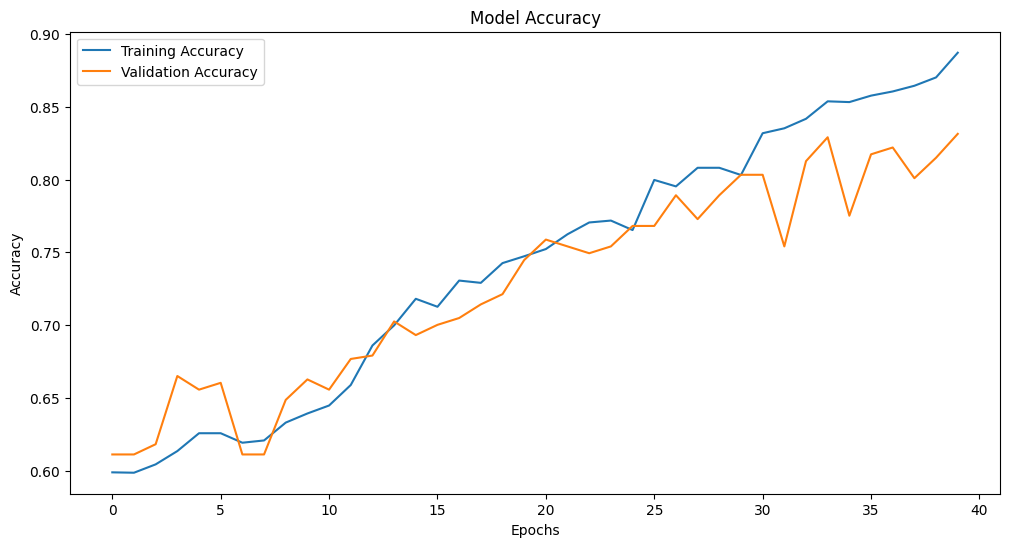

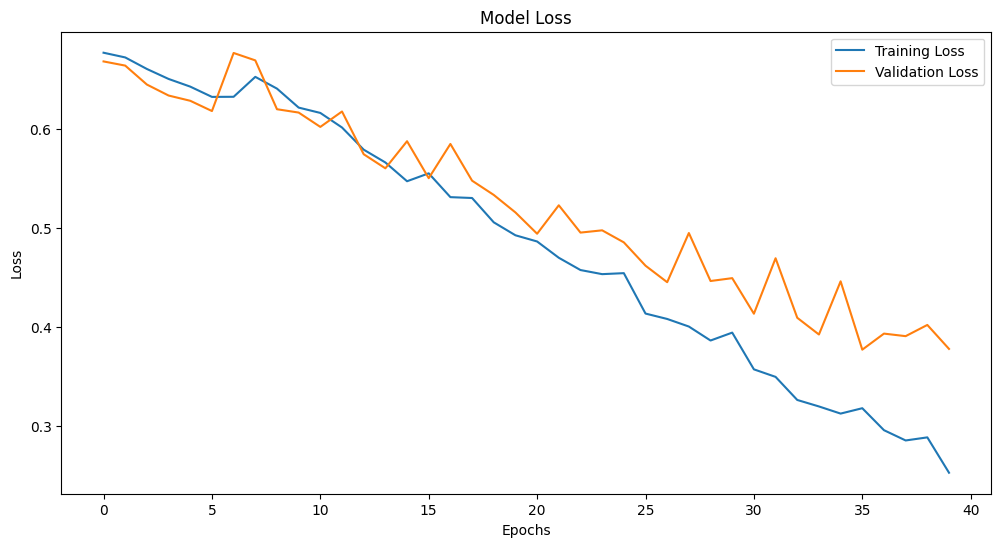

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
temp = Model(inputs=inputs, outputs=x13)

In [ ]:
temp.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          12,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             202 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,670 (213.55 KB)

 Trainable params: 54,670 (213.55 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (3835, 64, 64, 3)
y_train shape: (3835,)
x_test shape: (427, 64, 64, 3)
y_test shape: (427,)


In [ ]:
# Flatten the images
x_train_flat = x_train.reshape(x_train.shape[0], -1)  # Flatten all images in x_train
x_test_flat = x_test.reshape(x_test.shape[0], -1)  # Flatten all images in x_test

print(x_train_flat.shape, x_test_flat.shape)  # Ensure the shapes are now (samples, features)


(3835, 12288) (427, 12288)


RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(x_train_flat, y_train)

# Predict on the test set
y_pred = rf_model.predict(x_test_flat)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.9040


Accuracy: 0.9040
Precision: 0.8743
Recall: 0.8795
F1 Score: 0.8769

Confusion Matrix:
[[240  21]
 [ 20 146]]


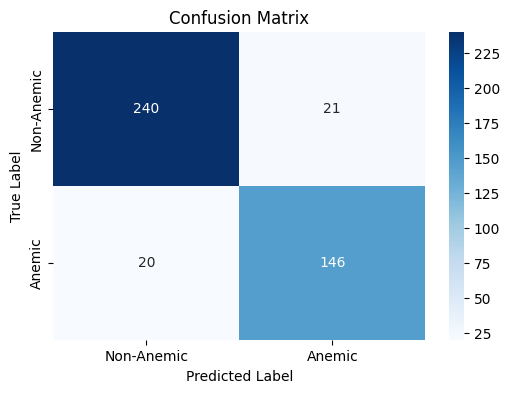


Classification Report:
              precision    recall  f1-score   support

  Non-Anemic       0.92      0.92      0.92       261
      Anemic       0.87      0.88      0.88       166

    accuracy                           0.90       427
   macro avg       0.90      0.90      0.90       427
weighted avg       0.90      0.90      0.90       427



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Create the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(x_train_flat, y_train)

# Predict on the test set
y_pred = rf_model.predict(x_test_flat)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred, average='binary')  # Use 'macro' or 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Anemic", "Anemic"], yticklabels=["Non-Anemic", "Anemic"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report (Optional: Provides detailed metrics)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Non-Anemic", "Anemic"]))


SVM

Accuracy: 0.9133
Precision: 0.8772
Recall: 0.9036
F1 Score: 0.8902

Confusion Matrix:
[[240  21]
 [ 16 150]]


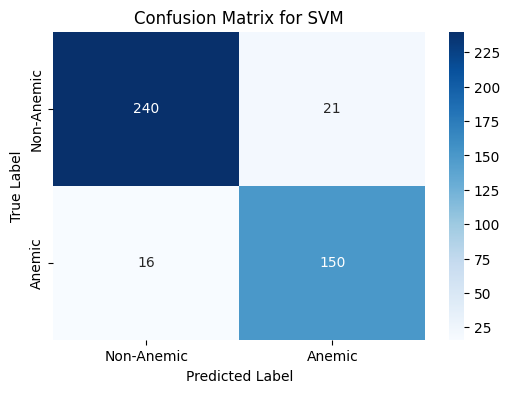


Classification Report:
              precision    recall  f1-score   support

  Non-Anemic       0.94      0.92      0.93       261
      Anemic       0.88      0.90      0.89       166

    accuracy                           0.91       427
   macro avg       0.91      0.91      0.91       427
weighted avg       0.91      0.91      0.91       427



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Create the SVM classifier (with a linear kernel)
svm_model = SVC(kernel='linear', random_state=42, probability=True)

# Train the model
svm_model.fit(x_train_flat, y_train)

# Predict on the test set
y_pred = svm_model.predict(x_test_flat)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='binary')  # Use 'macro' or 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Anemic", "Anemic"], yticklabels=["Non-Anemic", "Anemic"])
plt.title("Confusion Matrix for SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Optional: Print the full classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Non-Anemic", "Anemic"]))


Bagging

Accuracy: 0.9110
Precision: 0.8902
Recall: 0.8795
F1 Score: 0.8848

Confusion Matrix:
[[243  18]
 [ 20 146]]


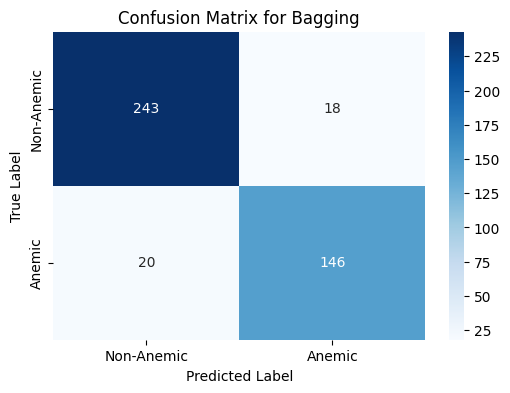


Classification Report:
              precision    recall  f1-score   support

  Non-Anemic       0.92      0.93      0.93       261
      Anemic       0.89      0.88      0.88       166

    accuracy                           0.91       427
   macro avg       0.91      0.91      0.91       427
weighted avg       0.91      0.91      0.91       427



In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Create the Bagging model
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)

# Train the model
bagging_model.fit(x_train_flat, y_train)

# Predict on the test set
y_pred = bagging_model.predict(x_test_flat)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Anemic", "Anemic"], yticklabels=["Non-Anemic", "Anemic"])
plt.title("Confusion Matrix for Bagging")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Optional: Print the full classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Non-Anemic", "Anemic"]))


Decision Tree

Accuracy: 0.9063
Precision: 0.8539
Recall: 0.9157
F1 Score: 0.8837

Confusion Matrix:
[[235  26]
 [ 14 152]]


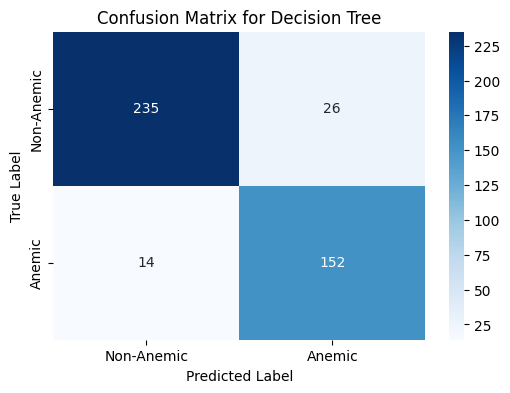


Classification Report:
              precision    recall  f1-score   support

  Non-Anemic       0.94      0.90      0.92       261
      Anemic       0.85      0.92      0.88       166

    accuracy                           0.91       427
   macro avg       0.90      0.91      0.90       427
weighted avg       0.91      0.91      0.91       427



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(x_train_flat, y_train)

# Predict on the test set
y_pred = dt_model.predict(x_test_flat)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Anemic", "Anemic"], yticklabels=["Non-Anemic", "Anemic"])
plt.title("Confusion Matrix for Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Optional: Print the full classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Non-Anemic", "Anemic"]))


k-NN

Accuracy: 0.6979
Precision: 0.6412
Recall: 0.5060
F1 Score: 0.5657

Confusion Matrix:
[[214  47]
 [ 82  84]]


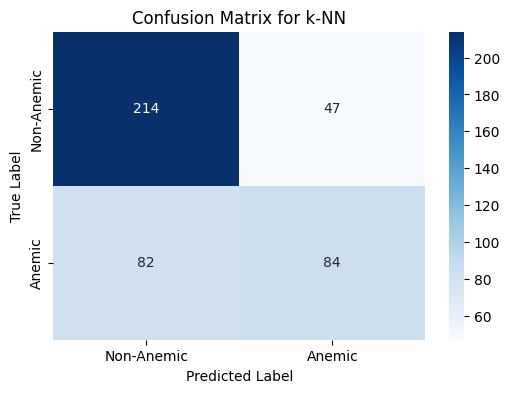


Classification Report:
              precision    recall  f1-score   support

  Non-Anemic       0.72      0.82      0.77       261
      Anemic       0.64      0.51      0.57       166

    accuracy                           0.70       427
   macro avg       0.68      0.66      0.67       427
weighted avg       0.69      0.70      0.69       427



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create the k-NN model
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(x_train_flat, y_train)

# Predict on the test set
y_pred = knn_model.predict(x_test_flat)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Anemic", "Anemic"], yticklabels=["Non-Anemic", "Anemic"])
plt.title("Confusion Matrix for k-NN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Optional: Print the full classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Non-Anemic", "Anemic"]))


Naive Bayes


Accuracy: 0.6112
Precision: 0.5000
Recall: 0.5843
F1 Score: 0.5389

Confusion Matrix:
[[164  97]
 [ 69  97]]


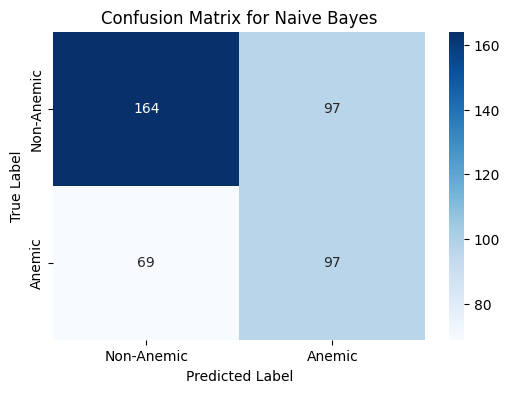


Classification Report:
              precision    recall  f1-score   support

  Non-Anemic       0.70      0.63      0.66       261
      Anemic       0.50      0.58      0.54       166

    accuracy                           0.61       427
   macro avg       0.60      0.61      0.60       427
weighted avg       0.62      0.61      0.62       427



In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create the Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(x_train_flat, y_train)

# Predict on the test set
y_pred = nb_model.predict(x_test_flat)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Anemic", "Anemic"], yticklabels=["Non-Anemic", "Anemic"])
plt.title("Confusion Matrix for Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Optional: Print the full classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Non-Anemic", "Anemic"]))


XGBoost

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:56:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9040
Precision: 0.8698
Recall: 0.8855
F1 Score: 0.8776

Confusion Matrix:
[[239  22]
 [ 19 147]]


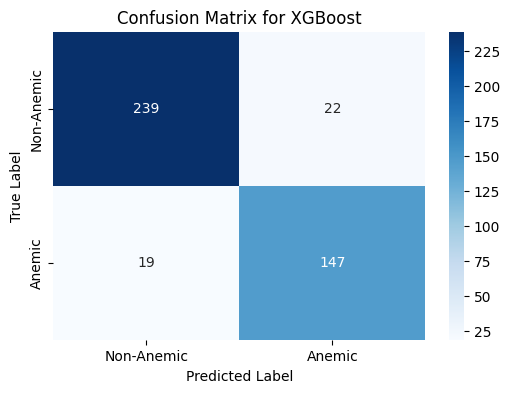


Classification Report:
              precision    recall  f1-score   support

  Non-Anemic       0.93      0.92      0.92       261
      Anemic       0.87      0.89      0.88       166

    accuracy                           0.90       427
   macro avg       0.90      0.90      0.90       427
weighted avg       0.90      0.90      0.90       427



In [ ]:
from xgboost import XGBClassifier

# Create the XGBoost model
xgb_model = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)

# Train the model
xgb_model.fit(x_train_flat, y_train)

# Predict on the test set
y_pred = xgb_model.predict(x_test_flat)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Anemic", "Anemic"], yticklabels=["Non-Anemic", "Anemic"])
plt.title("Confusion Matrix for XGBoost")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Optional: Print the full classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Non-Anemic", "Anemic"]))


AdaBoost

Accuracy: 0.6698
Precision: 0.6190
Recall: 0.3916
F1 Score: 0.4797

Confusion Matrix:
[[221  40]
 [101  65]]


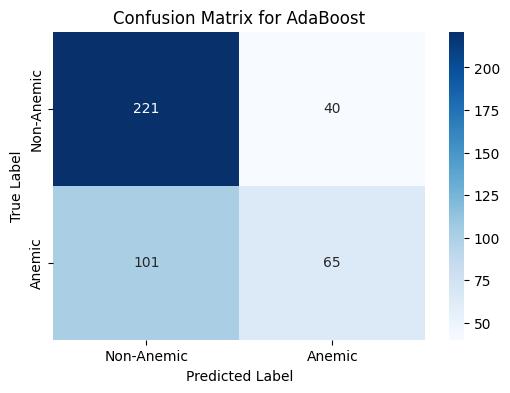


Classification Report:
              precision    recall  f1-score   support

  Non-Anemic       0.69      0.85      0.76       261
      Anemic       0.62      0.39      0.48       166

    accuracy                           0.67       427
   macro avg       0.65      0.62      0.62       427
weighted avg       0.66      0.67      0.65       427



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Create the AdaBoost model (using default base estimator, which is DecisionTreeClassifier(max_depth=1))
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the model
ada_model.fit(x_train_flat, y_train)

# Predict on the test set
y_pred = ada_model.predict(x_test_flat)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Anemic", "Anemic"], yticklabels=["Non-Anemic", "Anemic"])
plt.title("Confusion Matrix for AdaBoost")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Optional: Print the full classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Non-Anemic", "Anemic"]))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:34:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


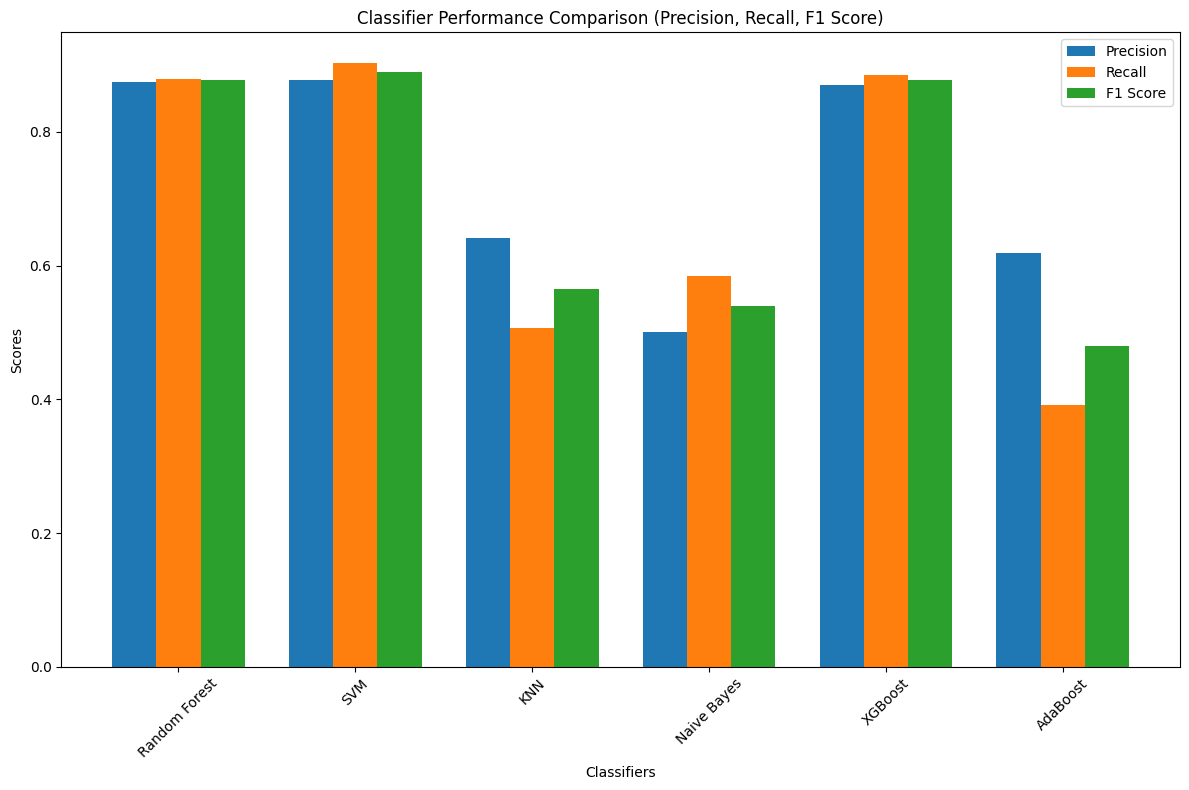

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# List of classifiers (make sure you have already created the classifiers)
classifiers = {
    "Random Forest": rf_model,
    "SVM": svm_model,
    "KNN": knn_model,
    "Naive Bayes": nb_model,
    "XGBoost": xgb_model,
    "AdaBoost": ada_model,
}

# Fit each model first before predicting
for name, model in classifiers.items():
    model.fit(x_train_flat, y_train)  # Fit the model

# Initialize lists to store scores
precision_scores = []
recall_scores = []
f1_scores = []
classifier_names = []

# Calculate metrics for each classifier
for name, model in classifiers.items():
    # Predict on the test set
    y_pred = model.predict(x_test_flat)

    # Calculate precision, recall, and F1 score
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    # Append to lists
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    classifier_names.append(name)

# Set up the bar width and positions for the plot
bar_width = 0.25
index = np.arange(len(classifiers))

# Create a figure for plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the bars for Precision, Recall, and F1 Score
bar1 = ax.bar(index - bar_width, precision_scores, bar_width, label='Precision')
bar2 = ax.bar(index, recall_scores, bar_width, label='Recall')
bar3 = ax.bar(index + bar_width, f1_scores, bar_width, label='F1 Score')

# Add labels and title
ax.set_xlabel('Classifiers')
ax.set_ylabel('Scores')
ax.set_title('Classifier Performance Comparison (Precision, Recall, F1 Score)')
ax.set_xticks(index)
ax.set_xticklabels(classifier_names, rotation=45)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:53:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


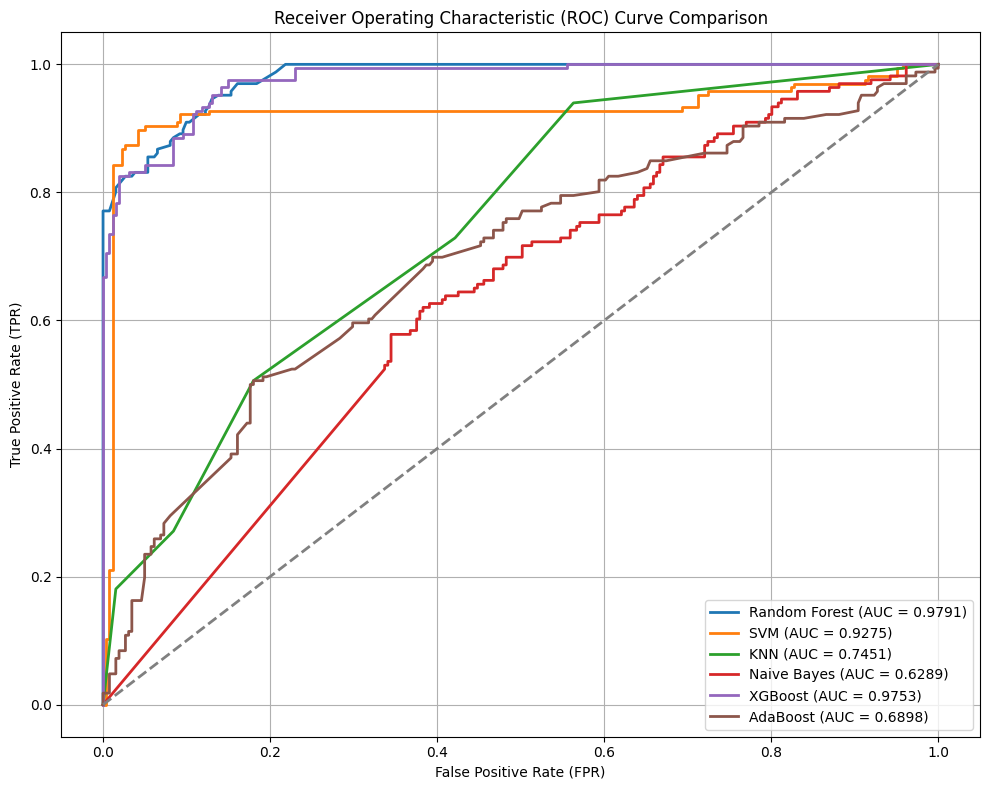

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Ensure classifiers are already trained
for name, model in classifiers.items():
    model.fit(x_train_flat, y_train)  # Fit the model to the training data

# Binarize the labels (if not already binary)
y_test_bin = label_binarize(y_test, classes=[0, 1])

# Set up the plot
plt.figure(figsize=(10, 8))

# Iterate through each classifier and plot its ROC curve
for name, model in classifiers.items():
    # Get the predicted probabilities for the positive class (1)
    y_pred_prob = model.predict_proba(x_test_flat)[:, 1]

    # Compute the ROC curve
    fpr, tpr, _ = roc_curve(y_test_bin, y_pred_prob)

    # Compute the AUC score
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.4f})')

# Plot the diagonal line (random classifier, AUC = 0.5)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)

# Customize the plot
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:11:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


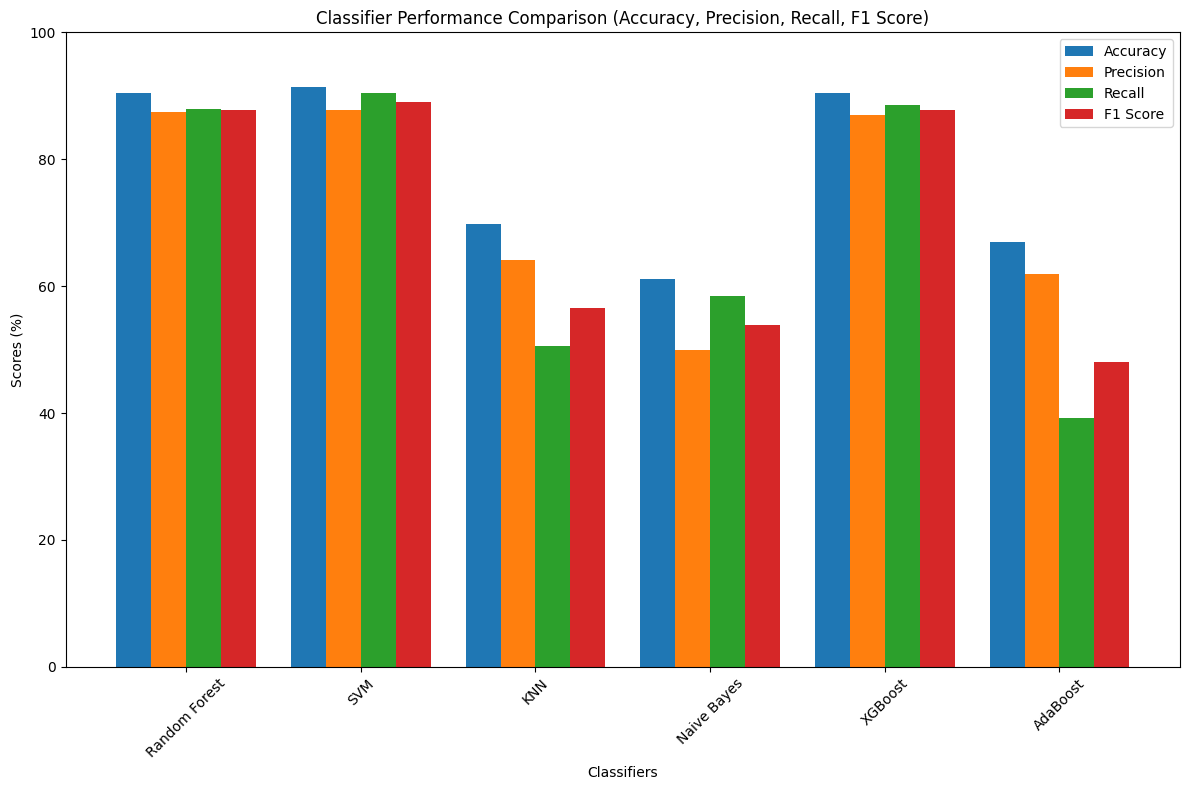

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# List of classifiers (make sure you have already created the classifiers)
classifiers = {
    "Random Forest": rf_model,
    "SVM": svm_model,
    "KNN": knn_model,
    "Naive Bayes": nb_model,
    "XGBoost": xgb_model,
    "AdaBoost": ada_model,
}

# Fit each model first before predicting
for name, model in classifiers.items():
    model.fit(x_train_flat, y_train)  # Fit the model

# Initialize lists to store scores
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
classifier_names = []

# Calculate metrics for each classifier
for name, model in classifiers.items():
    # Predict on the test set
    y_pred = model.predict(x_test_flat)

    # Calculate accuracy, precision, recall, and F1 score
    accuracy = accuracy_score(y_test, y_pred) * 100  # Convert to percentage
    precision = precision_score(y_test, y_pred, average='binary') * 100  # Convert to percentage
    recall = recall_score(y_test, y_pred, average='binary') * 100  # Convert to percentage
    f1 = f1_score(y_test, y_pred, average='binary') * 100  # Convert to percentage

    # Append to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    classifier_names.append(name)

# Set up the figure
fig, ax = plt.subplots(figsize=(12, 8))

# Set positions for the classifiers
bar_width = 0.2
index = np.arange(len(classifiers))

# Plot the bars for each metric (Accuracy, Precision, Recall, F1 Score)
bar1 = ax.bar(index - 1.5 * bar_width, accuracy_scores, bar_width, label='Accuracy')
bar2 = ax.bar(index - 0.5 * bar_width, precision_scores, bar_width, label='Precision')
bar3 = ax.bar(index + 0.5 * bar_width, recall_scores, bar_width, label='Recall')
bar4 = ax.bar(index + 1.5 * bar_width, f1_scores, bar_width, label='F1 Score')

# Add labels and title
ax.set_xlabel('Classifiers')
ax.set_ylabel('Scores (%)')
ax.set_title('Classifier Performance Comparison (Accuracy, Precision, Recall, F1 Score)')
ax.set_xticks(index)
ax.set_xticklabels(classifier_names, rotation=45)
ax.set_ylim(0, 100)  # Set the y-axis from 0 to 100
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()
